In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/Project 3&4 Dataset.csv")
df.shape
df.head(22)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.0

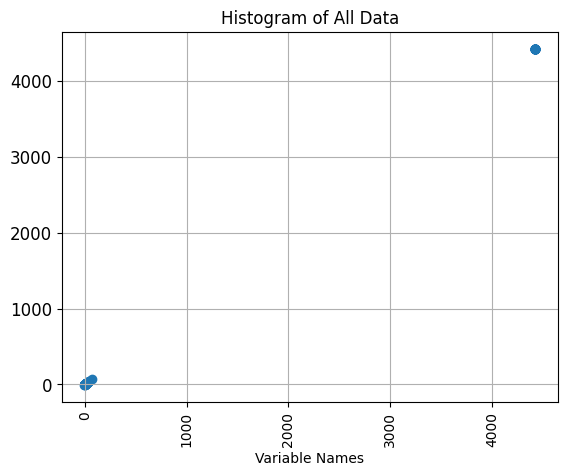

In [ ]:
from scipy.stats import describe
description = df.describe()
print(description)
plt.scatter(description,description.values)
plt.xticks(rotation=90)
plt.xlabel("Variable Names")
plt.title("Histogram of All Data")
plt.grid(True)
plt.yticks(fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


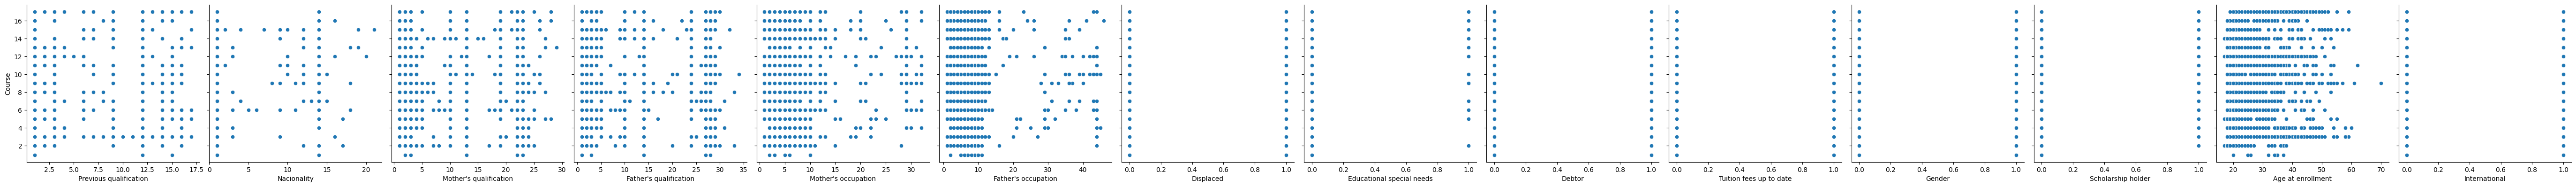

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#change df.columns for more data
columns_to_use = df.columns[5:19]
sns.pairplot(df, x_vars=df[columns_to_use], y_vars='Course', size=4, aspect=1, kind='scatter')
plt.show()

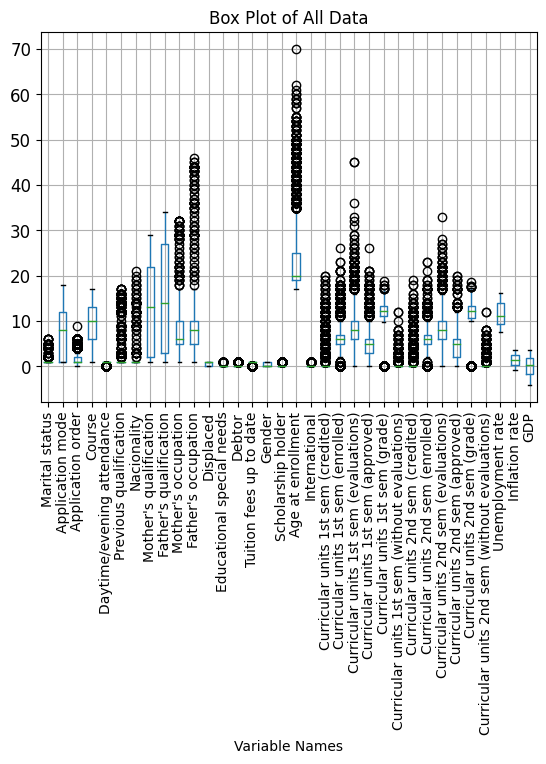

In [ ]:
df.boxplot()
plt.xticks(rotation=90)
plt.xlabel("Variable Names")
plt.title("Box Plot of All Data")
plt.grid(True)
plt.yticks(fontsize=12)
plt.show()

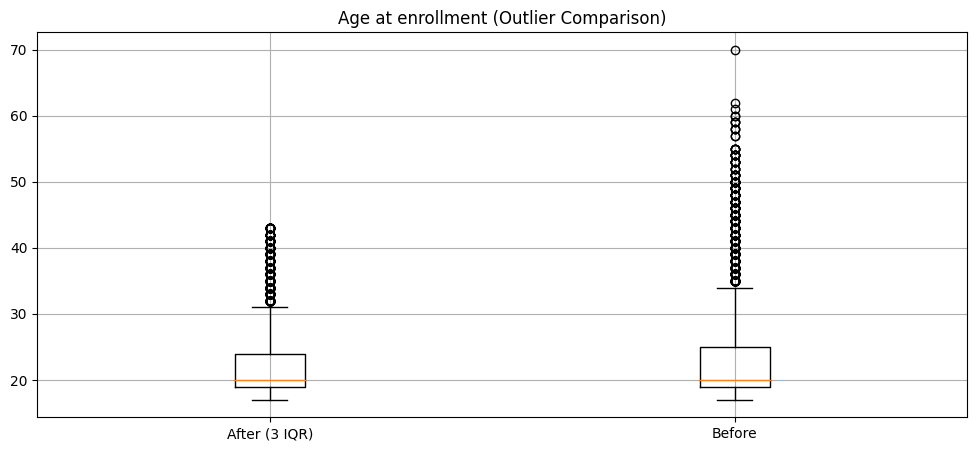

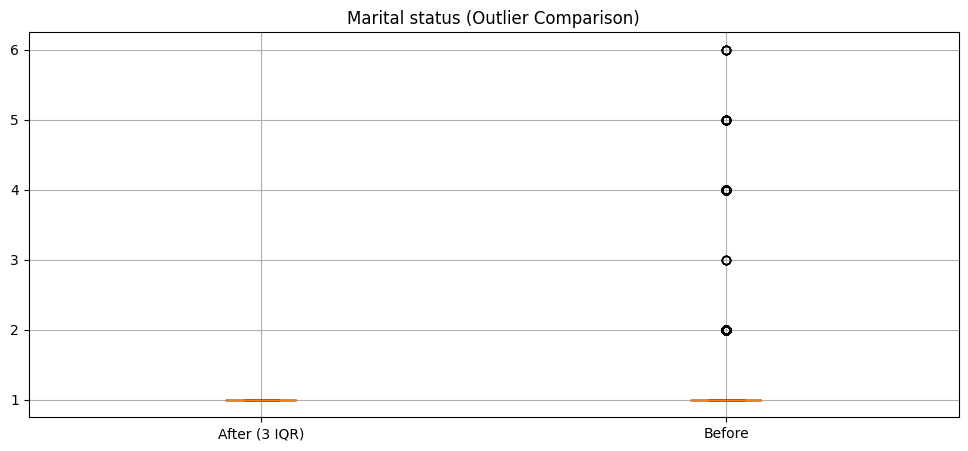

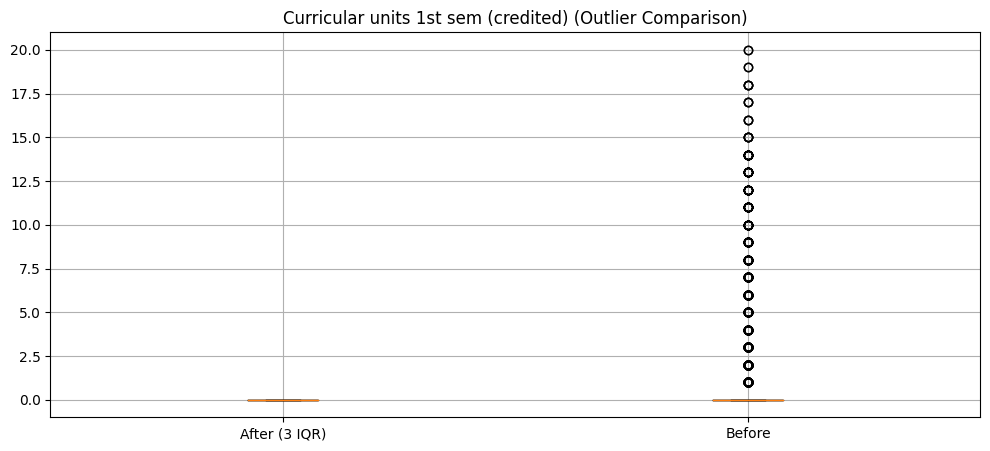

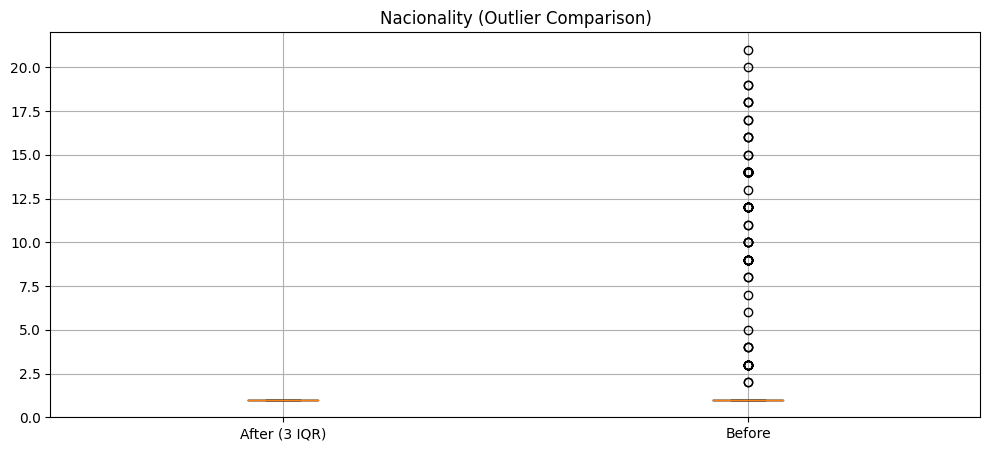

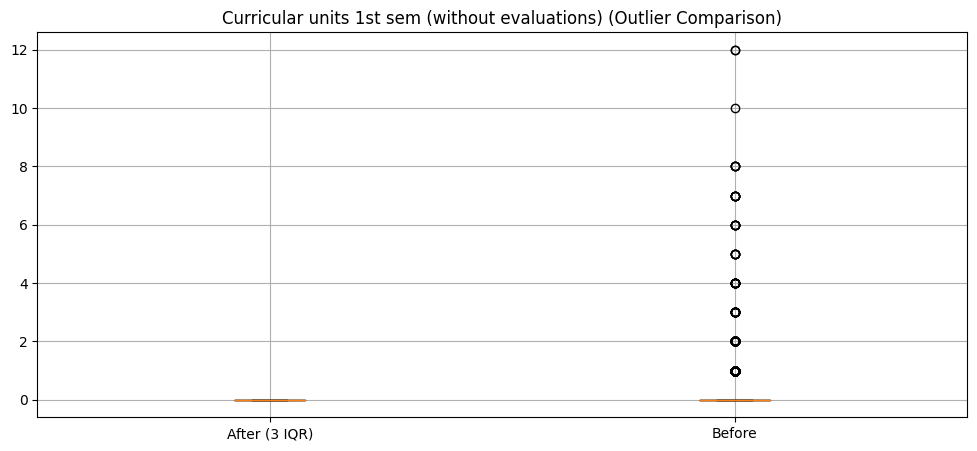

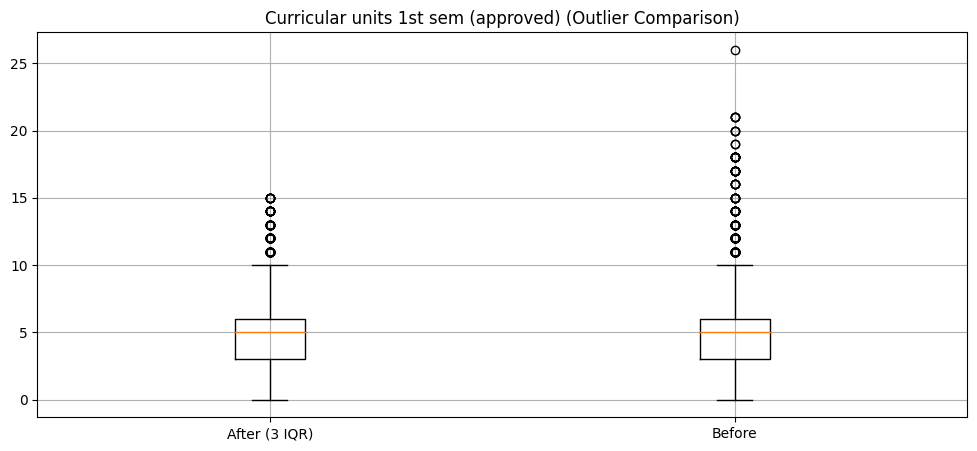

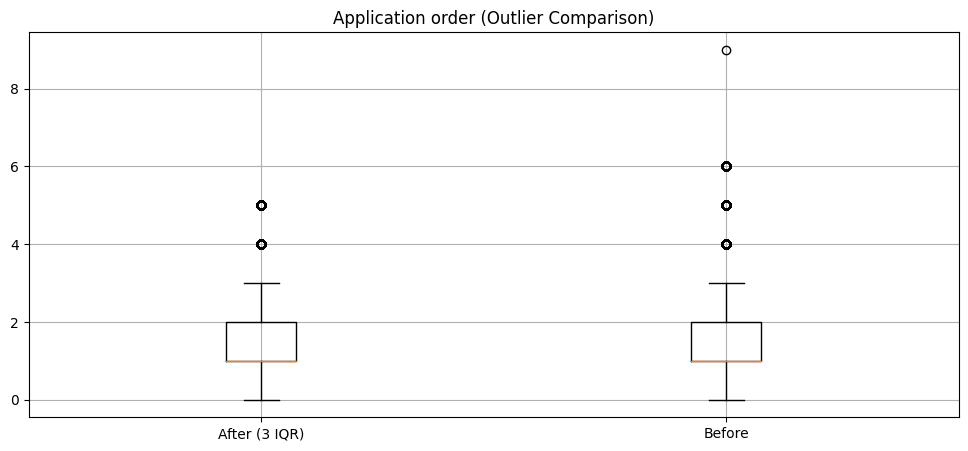

None
None
None
None
None
None
None
None


In [ ]:
def handle_outliers(df, column_name, iqr_multiplier=3):
  # Calculate IQR (Interquartile Range)
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define upper and lower bounds for outlier detection
  lower_bound = Q1 - (iqr_multiplier * IQR)
  upper_bound = Q3 + (iqr_multiplier * IQR)

  # Filter data in-place using boolean indexing
  mask = (df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)
  df = df[mask]  # This modifies the original dataframe

  return df
# Example usage
df_filtered1 = handle_outliers(df.copy(), 'Age at enrollment')
df_filtered2 = handle_outliers(df.copy(), 'Marital status')
df_filtered3 = handle_outliers(df.copy(), 'Curricular units 1st sem (credited)')
df_filtered4 = handle_outliers(df.copy(), 'Nacionality')
df_filtered5 = handle_outliers(df.copy(), 'Curricular units 1st sem (without evaluations)')
df_filtered6 = handle_outliers(df.copy(), 'Curricular units 1st sem (approved)')
df_filtered7 = handle_outliers(df.copy(), 'Application order')

#if needed to print information
#print(df_filtered1)
#print(df_filtered2)
#print(df_filtered3)
#print(df_filtered4)
#print(df_filtered5)
#print(df_filtered6)
#print(df_filtered7)

def visualize_outliers_removed(df_filtered, column_name, iqr_multiplier=3):
  plt.figure(figsize=(12, 5))
  plt.boxplot([df_filtered[column_name], df[column_name]], labels=[f"After ({iqr_multiplier} IQR)", f"Before"])
  plt.title(f"{column_name} (Outlier Comparison)")
  plt.grid(True)
  plt.show()


visualize_Age = visualize_outliers_removed(df_filtered1,'Age at enrollment')
visualize_Status = visualize_outliers_removed(df_filtered2,'Marital status')
visualize_sem1_credited = visualize_outliers_removed(df_filtered3,'Curricular units 1st sem (credited)')
visualize_Nacionality = visualize_outliers_removed(df_filtered4,'Nacionality')
visualize_sem1_we = visualize_outliers_removed(df_filtered5,'Curricular units 1st sem (without evaluations)')
visualize_sem1_app = visualize_outliers_removed(df_filtered6,'Curricular units 1st sem (approved)')
visualize_app_order = visualize_outliers_removed(df_filtered7,'Application order')

print(visualize_Age)
print(visualize_Status)
print(visualize_sem1_credited)
print(visualize_sem1_app)
print(visualize_sem1_we)
print(visualize_Nacionality)
print(visualize_app_order)
print(visualize_sem1_app)



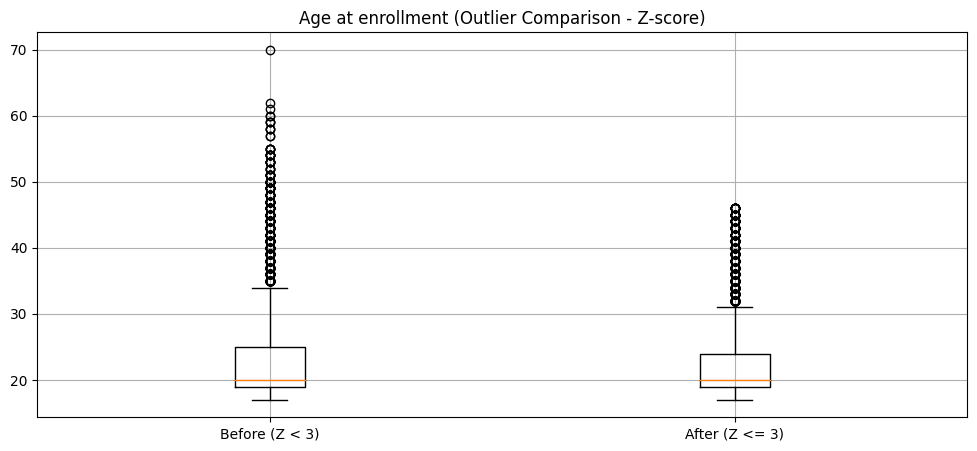

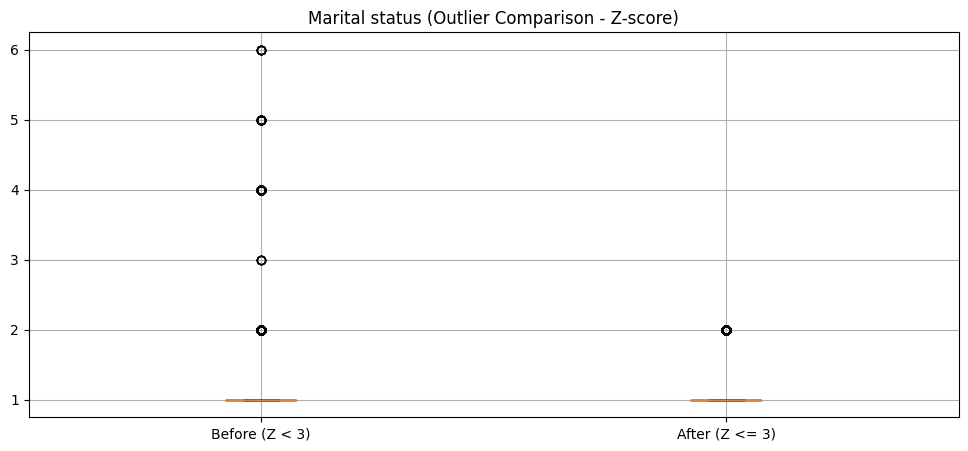

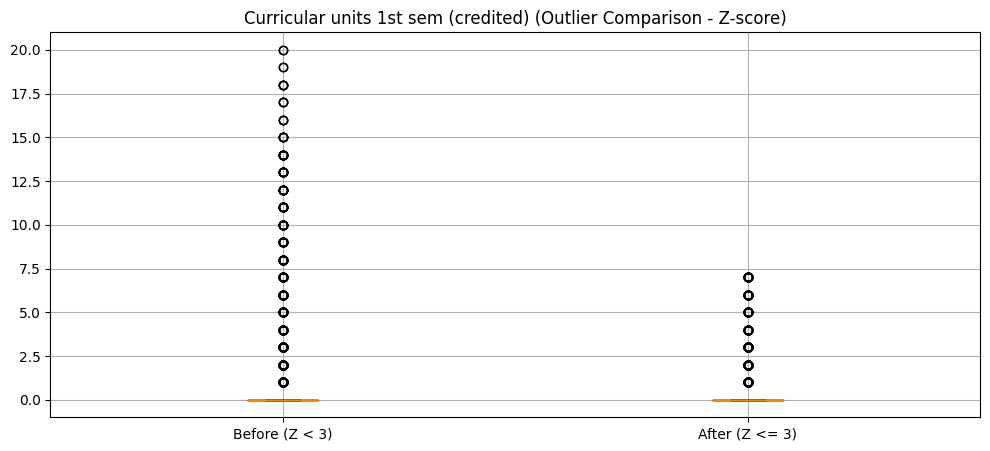

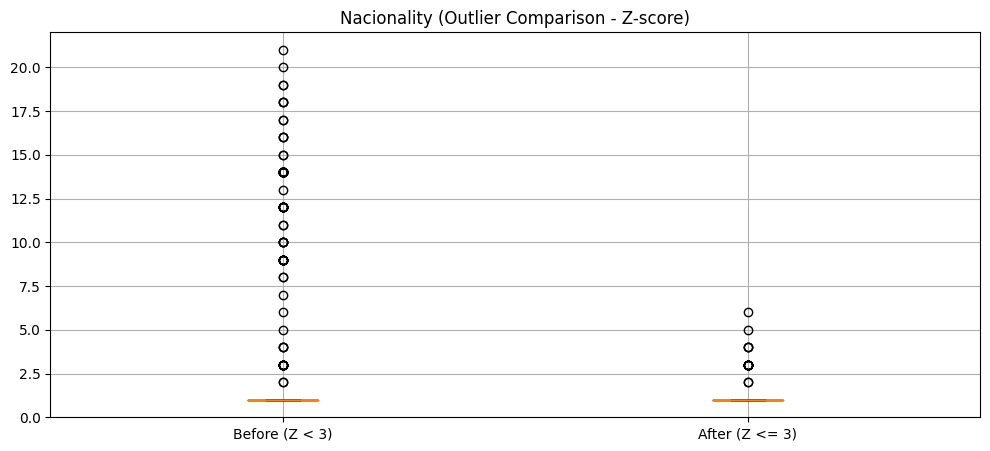

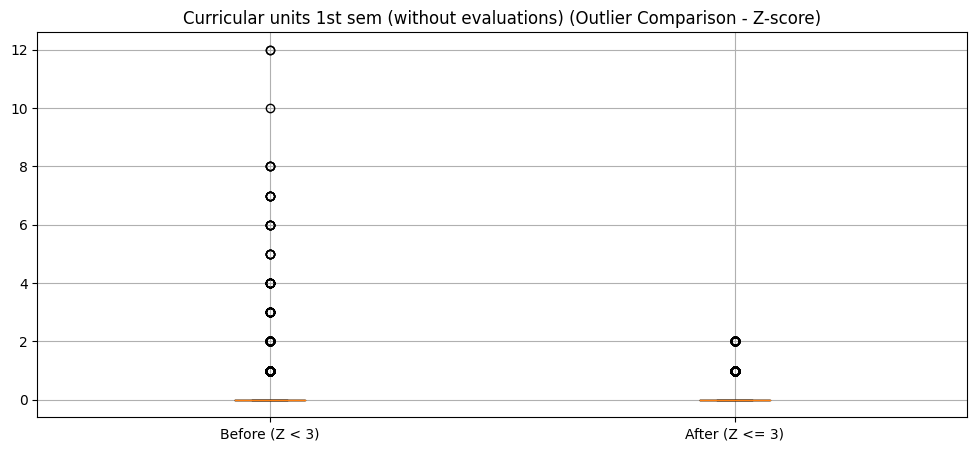

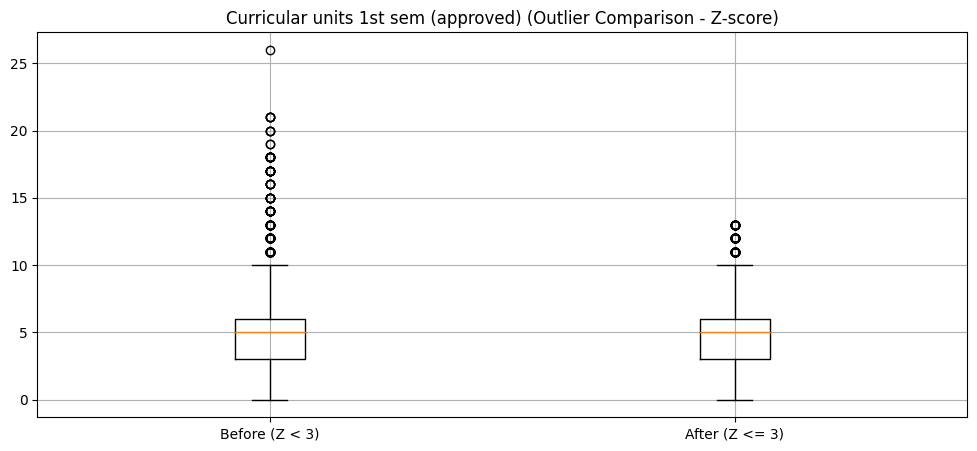

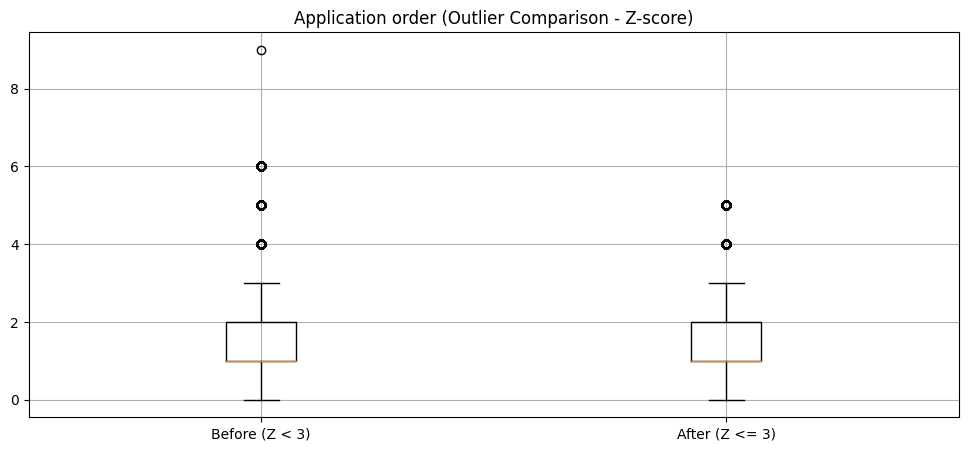

In [ ]:
#z score method
import numpy as np

def visualize_outliers_removed_z(df, column_name, threshold=3):

  mean = df[column_name].mean()
  std = df[column_name].std()
  mask = np.abs(df[column_name] - mean) <= threshold * std  # Efficient mask creation
  filtered_df = df[mask]

  plt.figure(figsize=(12, 5))
  plt.boxplot([df[column_name], filtered_df[column_name]], labels=[f"Before (Z < {threshold})", f"After (Z <= {threshold})"])
  plt.title(f"{column_name} (Outlier Comparison - Z-score)")
  plt.grid(True)
  plt.show()


visualize_outliers_removed_z(df, 'Age at enrollment')
visualize_outliers_removed_z(df, 'Marital status')
visualize_outliers_removed_z(df, 'Curricular units 1st sem (credited)')
visualize_outliers_removed_z(df, 'Nacionality')
visualize_outliers_removed_z(df, 'Curricular units 1st sem (without evaluations)')
visualize_outliers_removed_z(df, 'Curricular units 1st sem (approved)')
visualize_outliers_removed_z(df, 'Application order')



Shape of X before split: (4424, 140)
Shape of y before split: (4424,)
Missing values in X_test: 0
Missing values in y_test: 0
Shape of X_test: (885, 140)
Shape of y_test: (885,)
Error: y and y_pred have different lengths. Check data handling or missing values.
Mean Squared Error: 3.683473912747003e+25


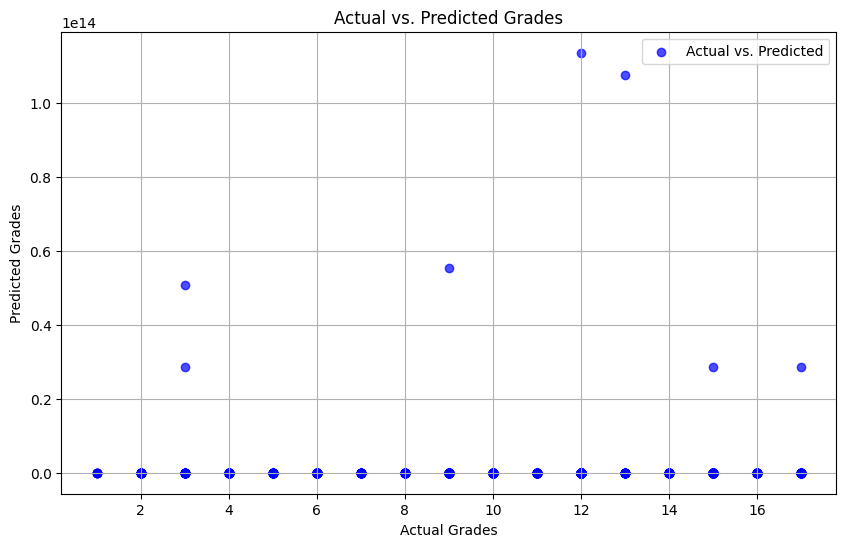

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into a DataFrame named 'df'

# Select relevant features (replace with your desired features)
features = [ 'Educational special needs','Marital status','Age at enrollment',
  'Mother\'s qualification', 'Father\'s qualification', 'Curricular units 1st sem (enrolled)',
]

# Define the target variable
target = 'Course'

# Create a copy to avoid modifying the original DataFrame
df_encoded = pd.get_dummies(df[features], columns=features)

# Separate features (X) and target variable (y)
X = df_encoded
y = df[target]

# Print the shapes before splitting for verification
print(f"Shape of X before split: {X.shape}")
print(f"Shape of y before split: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes after splitting for verification
print(f"Missing values in X_test: {X_test.isnull().sum().sum()}")
print(f"Missing values in y_test: {y_test.isnull().sum()}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
# Create a LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set (ensure X_test and y_test have same size)
y_pred = model.predict(X_test)

# Ensure y and y_pred have the same size before plotting
if len(y) != len(y_pred):
    print("Error: y and y_pred have different lengths. Check data handling or missing values.")
else:
    # Visualize actual vs. predicted grades (correct usage)
    plt.scatter(y, y_pred, color='blue', alpha=0.7, label='Actual vs. Predicted')
    plt.title('Actual vs. Predicted Grades')
    plt.xlabel('Actual Grades')
    plt.ylabel('Predicted Grades')
    plt.legend()
    plt.grid(True)
    plt.show()
# Make predictions on the entire dataset
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize actual vs. predicted grades
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs. Predicted')
plt.title('Actual vs. Predicted Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Visualize feature importances (if using a model that supports it)
if hasattr(model, 'feature_importances_'):
  feature_importances = pd.Series(model.feature_importances_, index=features)
  feature_importances.sort_values(ascending=False, inplace=True)  # Sort by importance

  plt.figure(figsize=(8, 6))
  plt.barh(feature_importances.index, feature_importances.values)
  plt.title('Feature Importances')
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature')
  plt.grid(axis='x')
  plt.tight_layout()
  plt.show()

Shape of X before split: (4424, 201)
Shape of y before split: (4424,)
Missing values in X_test: 0
Missing values in y_test: 0
Shape of X_test: (885, 201)
Shape of y_test: (885,)
Mean Squared Error: 2.8793564198549903e+22


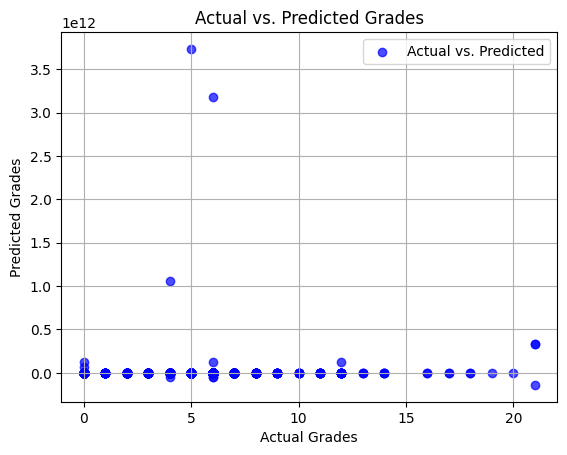

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Select relevant features (replace with your desired features)
features = ['Educational special needs','Marital status','Mother\'s qualification', 'Father\'s qualification', 'Curricular units 1st sem (enrolled)',
            'Curricular units 1st sem (credited)','Curricular units 1st sem (without evaluations)','Application order', 'Age at enrollment', 'Nacionality',]
# Define the target variable
target = 'Curricular units 1st sem (approved)'
# Create a copy to avoid modifying the original DataFrame
df_encoded = pd.get_dummies(df[features], columns=features)
# Separate features (X) and target variable (y)
X = df_encoded
y = df[target]

# Print the shapes before splitting for verification
print(f"Shape of X before split: {X.shape}")
print(f"Shape of y before split: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes after splitting for verification
print(f"Missing values in X_test: {X_test.isnull().sum().sum()}")
print(f"Missing values in y_test: {y_test.isnull().sum()}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Create a LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set (ensure X_test and y_test have same size)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
                  # I am having issues with this part will work on it
                  # Ensure y and y_pred have the same size before plotting
# if len(y) != len(y_pred):
#     print('the value y is: ')
#     print(y.shape)
#     print('the value y_pred is: ')
#     print(y_pred.shape)
#     print("Error: y and y_pred have different lengths. Check data handling or missing values.")
# else: (do correct indentaing if else is used)
        # Visualize actual vs. predicted grades (correct usage)
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs. Predicted')
plt.title('Actual vs. Predicted Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.legend()
plt.grid(True)
plt.show()

